<a href="https://colab.research.google.com/github/Jayashrimusale/Hirademy/blob/main/Ass_Hirademy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("/content/hirademy_data.csv")

# Handle missing values
df.dropna(inplace=True)

# Handle outliers
# Define a function to detect outliers using IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (data < lower_bound) | (data > upper_bound)
    return outliers

# Detect outliers in numerical columns
numerical_columns = ['Age', 'Income', 'Monthly Expenses', 'Existing Investments', 'Assets', 'Family Size', 'Debt Obligations']
outliers = df[numerical_columns].apply(detect_outliers_iqr)

# Drop rows with NaN values after outlier handling
df.dropna(inplace=True)

# Save the cleaned dataset
df.to_csv("/content/cleaned_hirademy_data.csv", index=False)


In [ ]:
df.head()

,Age,Income,Monthly Expenses,Existing Investments,Assets,Financial Goals,Risk Tolerance,Family Size,Debt Obligations,Hobbies/Interests
0,36,6200,3300,55000,100000,Buying a house,Medium,3,20000,"Cooking, painting"
1,31,5300,2600,35000,60000,Education,Medium,2,10000,"Reading, photography"
2,46,9000,4200,80000,180000,Retirement,Medium,4,30000,"Traveling, gardening"
3,35,6000,3000,50000,100000,Retirement,Medium,2,15000,"Hiking, cycling"
4,37,6400,3100,50000,100000,Retirement,Medium,3,20000,"Gardening, yoga"


In [ ]:
print("\nSummary statistics of numerical columns:")
print(df.describe())


Summary statistics of numerical columns:
             Age        Income  Monthly Expenses  Existing Investments  \
count  97.000000     97.000000         97.000000             97.000000   
mean   39.783505   7269.072165       3527.835052          65360.824742   
std     7.167965   1924.748946        784.981723          28941.818636   
min    28.000000   4000.000000       2000.000000          20000.000000   
25%    34.000000   5800.000000       3000.000000          50000.000000   
50%    38.000000   6500.000000       3300.000000          55000.000000   
75%    46.000000   8800.000000       4200.000000          80000.000000   
max    53.000000  11000.000000       5000.000000         130000.000000   

              Assets  Family Size  Debt Obligations  
count      97.000000    97.000000         97.000000  
mean   131030.927835     3.587629      26690.721649  
std     63990.307471     1.336605      12649.407780  
min     30000.000000     2.000000      10000.000000  
25%     90000.000000 

In [ ]:
df.shape

(97, 10)

In [ ]:
df.dropna(inplace=True)

In [ ]:
# Perform feature engineering
df['Total Net Worth'] = df['Assets'] - df['Debt Obligations']

# Save the dataset with new features
df.to_csv("/content/feature_engineered_hirademy_data.csv", index=False)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Read the feature-engineered dataset
df = pd.read_csv("/content/feature_engineered_hirademy_data.csv")

# Separate categorical and numerical features
categorical_features = ['Financial Goals', 'Risk Tolerance']
numerical_features = ['Age', 'Income', 'Monthly Expenses', 'Existing Investments', 'Assets', 'Family Size', 'Debt Obligations', 'Total Net Worth']

# One-hot encode categorical features
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = encoder.fit_transform(df[categorical_features])


# Normalize numerical features using Min-Max scaling
scaler = MinMaxScaler()
scaled_numerical = scaler.fit_transform(df[numerical_features])
scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_features)





/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


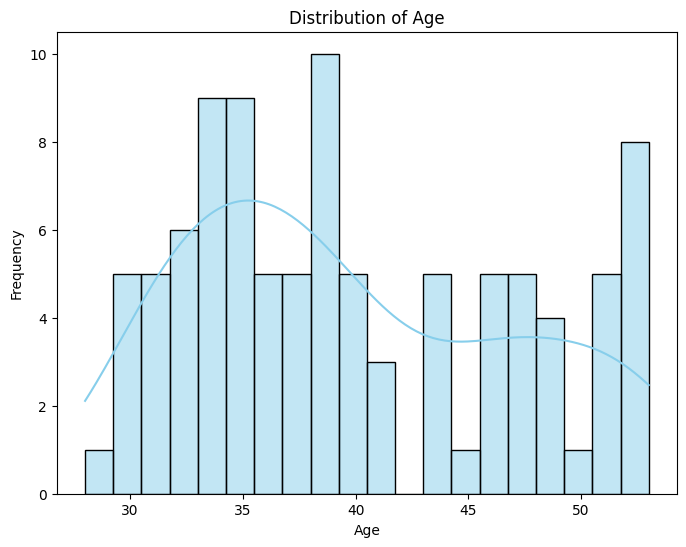

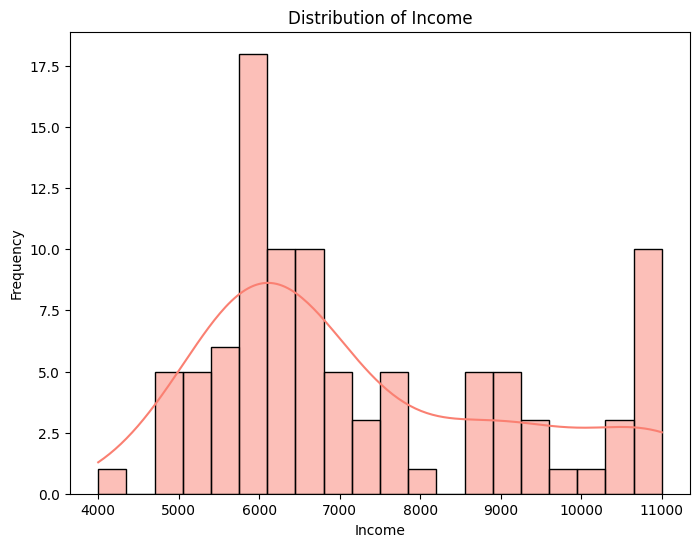

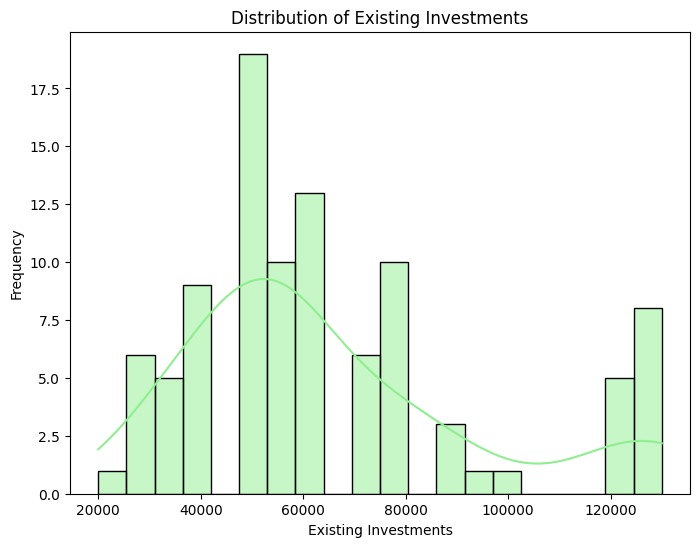

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the encoded and normalized dataset
df = pd.read_csv("/content/hirademy_data.csv")

# Plot the distribution of age
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of income
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of existing investments
plt.figure(figsize=(8, 6))
sns.histplot(df['Existing Investments'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Existing Investments')
plt.xlabel('Existing Investments')
plt.ylabel('Frequency')
plt.show()


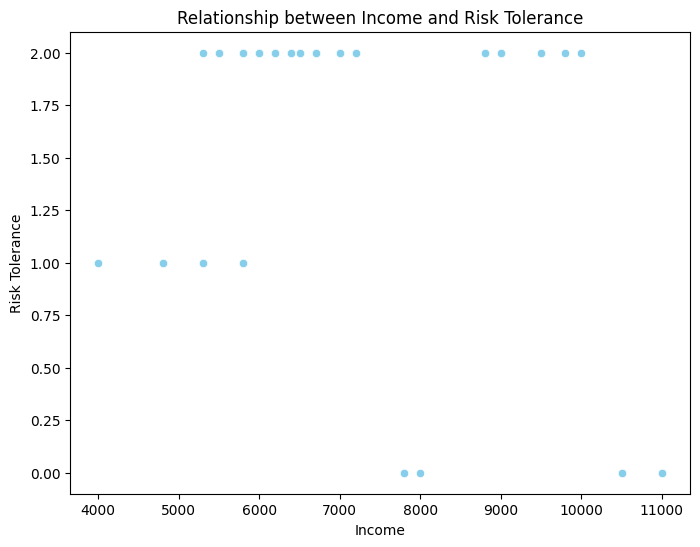

Correlation Matrix:
                  Income  Risk Tolerance
Income          1.000000       -0.470837
Risk Tolerance -0.470837        1.000000


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read the encoded and normalized dataset
df = pd.read_csv("/content/hirademy_data.csv")

# Apply label encoding to 'Risk Tolerance' column
label_encoder = LabelEncoder()
df['Risk Tolerance'] = label_encoder.fit_transform(df['Risk Tolerance'])

# Scatter plot to visualize the relationship between income and risk tolerance
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Risk Tolerance', data=df, color='skyblue')
plt.title('Relationship between Income and Risk Tolerance')
plt.xlabel('Income')
plt.ylabel('Risk Tolerance')
plt.show()

# Correlation analysis between income and risk tolerance
correlation = df[['Income', 'Risk Tolerance']].corr()
print("Correlation Matrix:")
print(correlation)


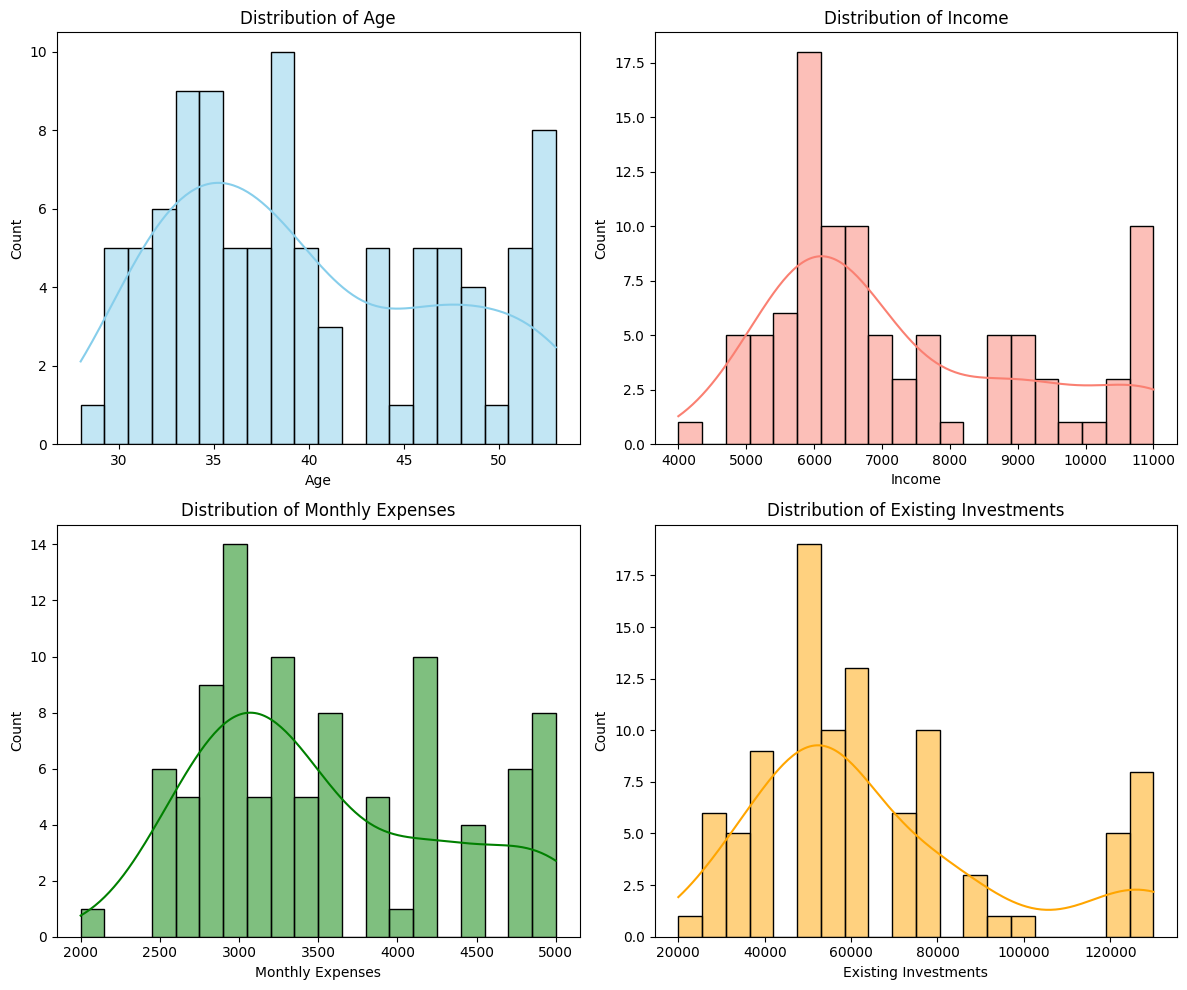

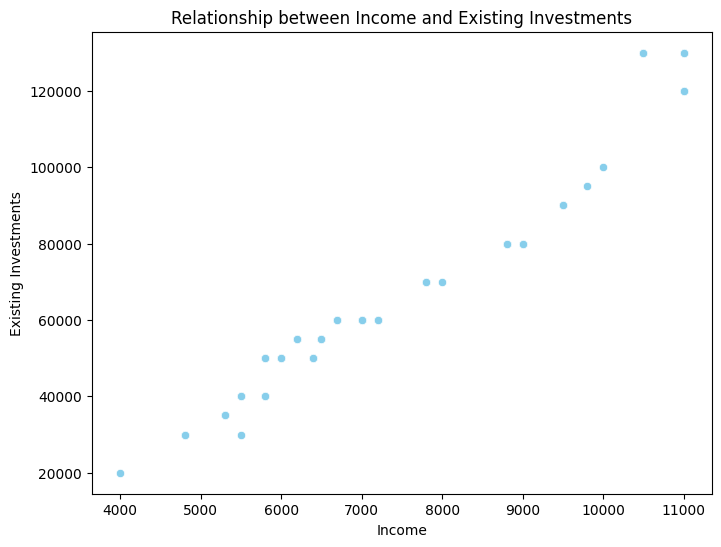

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the encoded and normalized dataset
df = pd.read_csv("/content/hirademy_data.csv")

# Histograms to visualize the distribution of numerical variables
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')

plt.subplot(2, 2, 2)
sns.histplot(df['Income'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Income')

plt.subplot(2, 2, 3)
sns.histplot(df['Monthly Expenses'], bins=20, kde=True, color='green')
plt.title('Distribution of Monthly Expenses')

plt.subplot(2, 2, 4)
sns.histplot(df['Existing Investments'], bins=20, kde=True, color='orange')
plt.title('Distribution of Existing Investments')

plt.tight_layout()
plt.show()

# Scatter plot to visualize the relationship between income and existing investments
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Existing Investments', data=df, color='skyblue')
plt.title('Relationship between Income and Existing Investments')
plt.xlabel('Income')
plt.ylabel('Existing Investments')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Read the preprocessed dataset
df = pd.read_csv("/content/hirademy_data.csv")

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns or encode them appropriately
# For simplicity, let's drop them in this example
df_numeric = df.drop(columns=non_numeric_columns)

# Split the dataset into features (X) and target variable (y)
X = df_numeric.drop(columns=['Family Size'])  # Features
y = df_numeric['Income']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Generate recommendations based on predictions
# (This part depends on the specific problem and business logic)


Non-numeric columns: Index(['Financial Goals', 'Risk Tolerance', 'Hobbies/Interests'], dtype='object')
Mean Squared Error: 4.748016716054379e-23


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, accuracy_score

# Load the preprocessed dataset
df = pd.read_csv("/content/hirademy_data.csv")

# For Linear Regression (Predicting Investment Returns)
# Drop any non-numeric columns and set X, y
X_reg = df.drop(columns=['Family Size', 'Income'])
y_reg = df['Family Size']

# For Random Forest Classifier (Categorizing Investment Preferences)
# Encode the target variable into numerical format
le = LabelEncoder()
df['Income'] = le.fit_transform(df['Income'])

# Set X, y for classification
X_clf = df


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the preprocessed dataset
df = pd.read_csv("/content/hirademy_data.csv")

# Prepare the data
X = df.drop(columns=['Family Size'])  # Features (independent variables)
y = df['Income']  # Target variable (investment returns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical features
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns to ensure the same set of features in both datasets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the preprocessed dataset
df = pd.read_csv("/content/hirademy_data.csv")

# Prepare the data
X = df.drop(columns=['Family Size'])  # Features (independent variables)
y = df['Income']  # Target variable (investment returns)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# One-hot encode categorical features
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

# Align columns to ensure the same set of features in both datasets
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='outer', axis=1, fill_value=0)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Apply PCA
pca = PCA(n_components=10)  # You can adjust the number of components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


In [ ]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.22916679 0.08240846 0.0629341  0.05638099 0.03852385 0.03146339
 0.030144   0.03012798 0.02953692 0.02952729]


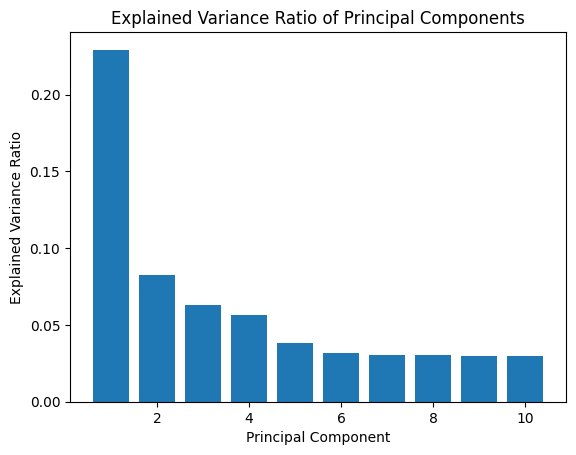

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier, HistGradientBoostingClassifier
from sklearn.decomposition import PCA
import xgboost as xgb


In [ ]:
base_classifiers = [
    ('LR', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('DT', DecisionTreeClassifier()),
    ('MLP', MLPClassifier()),
    ('SVM', SVC(probability=True))
]

In [ ]:
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

In [ ]:
for clf_name, clf in base_classifiers:
    # Train classifier
    clf.fit(X_train_pca, y_train)

    # Predictions
    y_pred = clf.predict(X_test_pca)

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append metrics to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    # Print results
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")

Classifier: LR
Accuracy: 0.85
Precision: 0.975
Recall: 0.85
F1 Score: 0.8866666666666667


Classifier: KNN
Accuracy: 0.55
Precision: 0.5375
Recall: 0.55
F1 Score: 0.5233333333333333


Classifier: DT
Accuracy: 0.85
Precision: 1.0
Recall: 0.85
F1 Score: 0.9033333333333333


Classifier: MLP
Accuracy: 0.85
Precision: 0.975
Recall: 0.85
F1 Score: 0.8866666666666667


Classifier: SVM
Accuracy: 0.6
Precision: 0.6125
Recall: 0.6
F1 Score: 0.5900000000000001




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-

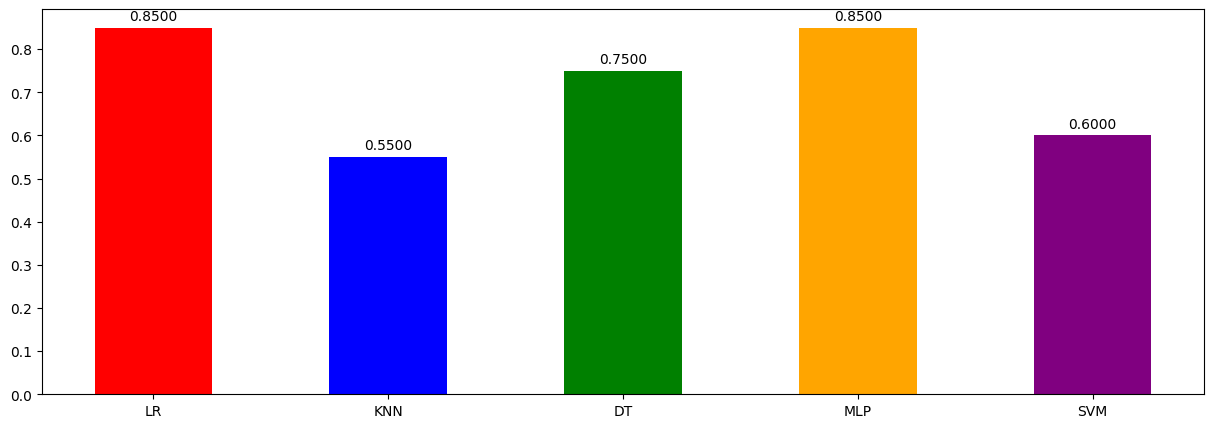

In [ ]:

plt.figure(figsize=(15, 5))

# Bar graph for base classifier
base_colors = ['red', 'blue', 'green', 'orange', 'purple']
base_x = np.arange(len(base_accuracy))
plt.bar(base_x, base_accuracy.values(), color=base_colors,width=0.5)
plt.xticks(base_x, base_accuracy.keys())
for i, acc in enumerate(base_accuracy.values()):
    plt.text(i, acc + 0.01, f"{acc:.4f}", ha='center', va='bottom')

In [ ]:
base_accuracy = {}
for clf_name, clf in base_classifiers:
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    base_accuracy[clf_name] = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
pip install catboost


In [ ]:
from catboost import CatBoostClassifier


In [ ]:

from catboost import CatBoostClassifier

classifiers = [
    ('Bagging (DT)', BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=15), n_estimators=150, random_state=42)),
    ('AdaBoost (DT)', AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=15), n_estimators=150, random_state=42)),
    ('Random Forest', RandomForestClassifier(n_estimators=150, max_depth=15, random_state=42)),
    ('Stacking', StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())),
    ('Voting', VotingClassifier(estimators=base_classifiers, voting='soft')),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=150, learning_rate=1.0, max_depth=15, random_state=42)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=150, max_depth=15, random_state=42)),
    ('CatBoost', CatBoostClassifier(random_state=42, verbose=0))  # Set verbose=0 to suppress CatBoost output
]

In [ ]:
accuracy_scores1 = []
precision_scores1 = []
recall_scores1 = []
f1_scores1 = []

In [ ]:
for clf_name, clf in classifiers:
    # Train classifier
    clf.fit(X_train_pca, y_train)

    # Predictions
    y_pred = clf.predict(X_test_pca)

    # Evaluate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append metrics to lists
    accuracy_scores1.append(accuracy)
    precision_scores1.append(precision)
    recall_scores1.append(recall)
    f1_scores1.append(f1)

    # Print results
    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: Bagging (DT)
Accuracy: 0.85
Precision: 1.0
Recall: 0.85
F1 Score: 0.9033333333333333


Classifier: AdaBoost (DT)
Accuracy: 0.85
Precision: 1.0
Recall: 0.85
F1 Score: 0.9033333333333333




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (20) does not match total number of classes (21). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulti

Classifier: Random Forest
Accuracy: 0.85
Precision: 0.975
Recall: 0.85
F1 Score: 0.8866666666666667




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (20) does not match total number of classes (21). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (19) does not match total number of classes (21). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fo

Classifier: Stacking
Accuracy: 0.6
Precision: 0.6166666666666667
Recall: 0.6
F1 Score: 0.595


Classifier: Voting
Accuracy: 0.85
Precision: 0.975
Recall: 0.85
F1 Score: 0.8866666666666667




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: Gradient Boosting
Accuracy: 0.8
Precision: 0.8916666666666666
Recall: 0.8
F1 Score: 0.8166666666666667




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classifier: Extra Trees
Accuracy: 0.9
Precision: 0.975
Recall: 0.9
F1 Score: 0.9247619047619049


Classifier: CatBoost
Accuracy: 0.85
Precision: 0.975
Recall: 0.85
F1 Score: 0.8866666666666667




/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:

clf_accuracy = {}
for clf_name, clf in classifiers:
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    clf_accuracy[clf_name] = accuracy_score(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (20) does not match total number of classes (21). Results may no

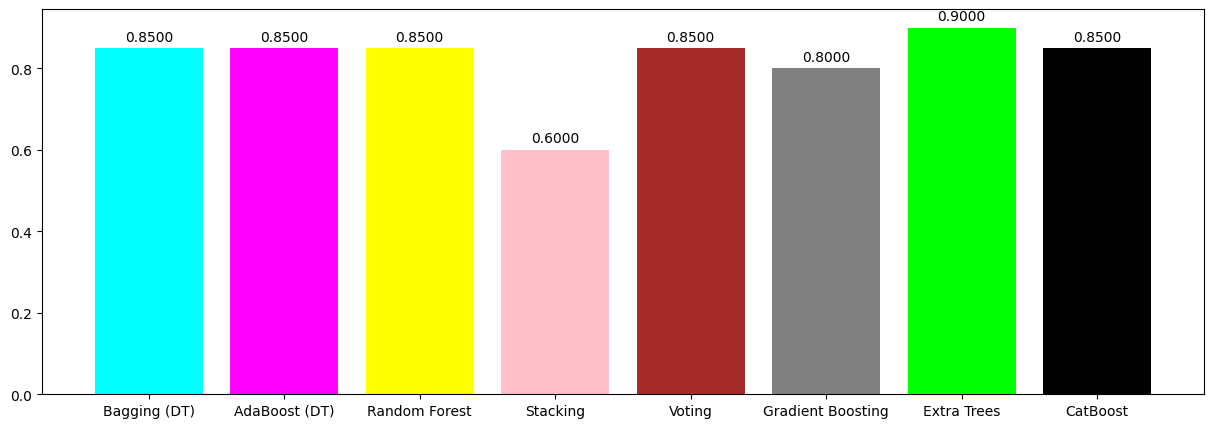

In [ ]:
plt.figure(figsize=(15, 5))

clf_colors = ['cyan', 'magenta', 'yellow', 'pink', 'brown', 'gray', 'lime', 'black']
clf_x = np.arange(len(classifiers)) + len(base_accuracy) + 1
plt.bar(clf_x, clf_accuracy.values(), color=clf_colors)
plt.xticks(clf_x, clf_accuracy.keys())
for i, acc in enumerate(clf_accuracy.values()):
    plt.text(i + len(base_accuracy) + 1, acc + 0.01, f"{acc:.4f}", ha='center', va='bottom')

After comparing, the best model is: Extra Trees


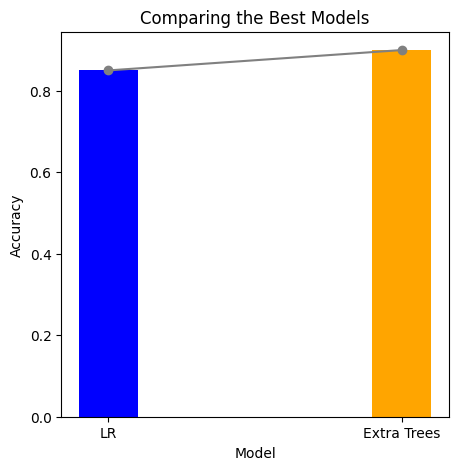

In [ ]:

plt.figure(figsize=(5, 5))

best_base = max(base_accuracy, key=base_accuracy.get)
best_clf = max(clf_accuracy, key=clf_accuracy.get)

bar_width = 0.2

plt.bar([best_base, best_clf], [base_accuracy[best_base], clf_accuracy[best_clf]], color=['blue', 'orange'], width=bar_width)

plt.plot([best_base, best_clf], [base_accuracy[best_base], clf_accuracy[best_clf]], marker='o', linestyle='-', color='gray')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparing the Best Models')
print(f"After comparing, the best model is: {best_base if base_accuracy[best_base] > clf_accuracy[best_clf] else best_clf}")

In [ ]:
metrics_df = pd.DataFrame({
    'Model': ['LR', 'KNN', 'DT', 'MLP', 'SVM', 'Bagging (DT)', 'AdaBoost (DT)', 'Random Forest', 'Stacking', 'Voting', 'Gradient Boosting', 'Extra Trees', 'CatBoost'],
    'Accuracy': accuracy_scores + accuracy_scores1,
    'Precision': precision_scores + precision_scores1,
    'Recall': recall_scores + recall_scores1,
    'F1 Score': f1_scores + f1_scores1
})


metrics_df.set_index('Model', inplace=True)


print("Metrics for Base Learners and Ensemble Learners:")
print(metrics_df)

Metrics for Base Learners and Ensemble Learners:
                   Accuracy  Precision  Recall  F1 Score
Model                                                   
LR                     0.85   0.975000    0.85  0.886667
KNN                    0.55   0.537500    0.55  0.523333
DT                     0.85   1.000000    0.85  0.903333
MLP                    0.85   0.975000    0.85  0.886667
SVM                    0.60   0.612500    0.60  0.590000
Bagging (DT)           0.85   1.000000    0.85  0.903333
AdaBoost (DT)          0.85   1.000000    0.85  0.903333
Random Forest          0.85   0.975000    0.85  0.886667
Stacking               0.60   0.616667    0.60  0.595000
Voting                 0.85   0.975000    0.85  0.886667
Gradient Boosting      0.80   0.891667    0.80  0.816667
Extra Trees            0.90   0.975000    0.90  0.924762
CatBoost               0.85   0.975000    0.85  0.886667


<ipython-input-108-18ced9647203>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df_accuracy.index, y='Accuracy', data=df_accuracy, palette='viridis')


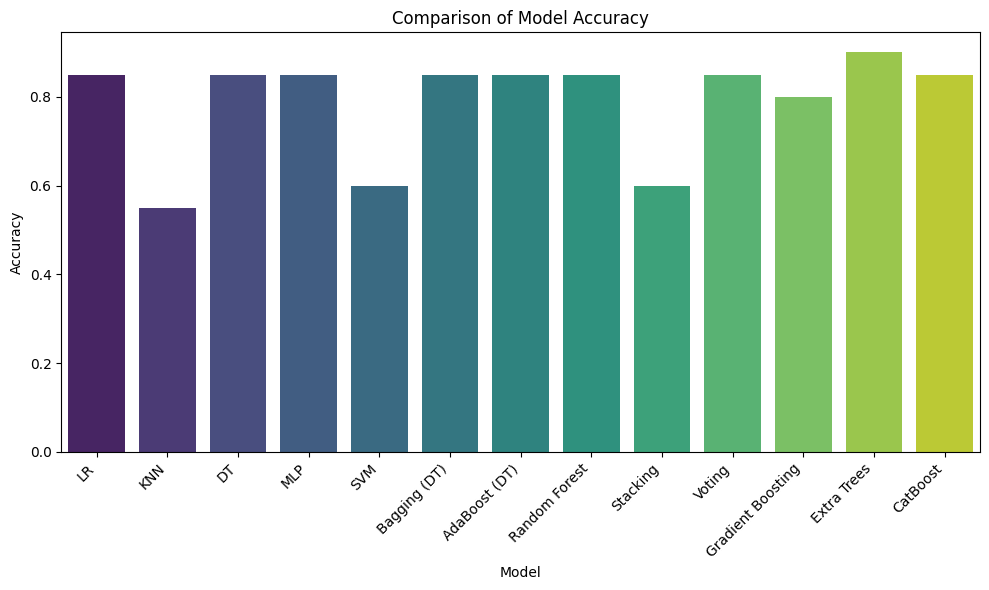

The best model based on accuracy is: Extra Trees


In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data
models = ['LR', 'KNN', 'DT', 'MLP', 'SVM', 'Bagging (DT)', 'AdaBoost (DT)', 'Random Forest', 'Stacking', 'Voting', 'Gradient Boosting', 'Extra Trees', 'CatBoost']
accuracy = [0.85, 0.55, 0.85, 0.85, 0.60, 0.85, 0.85, 0.85, 0.60, 0.85, 0.80, 0.90, 0.85]

# Create DataFrame
import pandas as pd
data = {'Model': models, 'Accuracy': accuracy}
df_accuracy = pd.DataFrame(data)
df_accuracy.set_index('Model', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=df_accuracy.index, y='Accuracy', data=df_accuracy, palette='viridis')
plt.title('Comparison of Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

best_model = df_accuracy.idxmax(axis=0)['Accuracy']
print("The best model based on accuracy is:", best_model)


In [ ]:

from sklearn.model_selection import cross_val_score

# Cross-validation for base classifiers
for clf_name, clf in base_classifiers:
    cv_scores = cross_val_score(clf, X_train_pca, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    print(f"Mean cross-validation accuracy for {clf_name}: {np.mean(cv_scores)}")
    print("\n")

# Cross-validation for ensemble classifiers
for clf_name, clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_pca, y_train, cv=5, scoring='accuracy')
    print(f"Cross-validation scores for {clf_name}: {cv_scores}")
    print(f"Mean cross-validation accuracy for {clf_name}: {np.mean(cv_scores)}")
    print("\n")

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores for LR: [0.9375     0.875      0.8        0.73333333 0.86666667]
Mean cross-validation accuracy for LR: 0.8425


Cross-validation scores for KNN: [0.8125     0.625      0.46666667 0.53333333 0.8       ]
Mean cross-validation accuracy for KNN: 0.6475


Cross-validation scores for DT: [0.8125     0.9375     0.8        0.8        0.86666667]
Mean cross-validation accuracy for DT: 0.8433333333333334




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't c

Cross-validation scores for MLP: [0.9375     0.875      0.8        0.73333333 0.86666667]
Mean cross-validation accuracy for MLP: 0.8425


Cross-validation scores for SVM: [0.8125     0.625      0.66666667 0.6        0.8       ]
Mean cross-validation accuracy for SVM: 0.7008333333333333




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/e

Cross-validation scores for Bagging (DT): [0.9375     0.9375     0.8        0.8        0.86666667]
Mean cross-validation accuracy for Bagging (DT): 0.8683333333333334


Cross-validation scores for AdaBoost (DT): [0.8125     0.9375     0.86666667 0.8        0.86666667]
Mean cross-validation accuracy for AdaBoost (DT): 0.8566666666666667




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/e

Cross-validation scores for Random Forest: [0.9375     0.9375     0.8        0.8        0.86666667]
Mean cross-validation accuracy for Random Forest: 0.8683333333333334




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:1116: RuntimeWarning: Number of classes in training fold (19) does not match total number of classes (20). Results may not be appropriate for your use case. To fix this, use a cross-validation technique resulting in properly stratified folds
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/mod

Cross-validation scores for Stacking: [0.875      0.875      0.8        0.73333333 0.86666667]
Mean cross-validation accuracy for Stacking: 0.8300000000000001




/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Cross-validation scores for Voting: [0.9375     0.9375     0.8        0.8        0.86666667]
Mean cross-validation accuracy for Voting: 0.8683333333333334


Cross-validation scores for Gradient Boosting: [0.8125     0.9375     0.8        0.8        0.86666667]
Mean cross-validation accuracy for Gradient Boosting: 0.8433333333333334




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores for Extra Trees: [0.9375     0.9375     0.86666667 0.8        0.86666667]
Mean cross-validation accuracy for Extra Trees: 0.8816666666666666




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores for CatBoost: [0.9375     0.9375     0.8        0.8        0.86666667]
Mean cross-validation accuracy for CatBoost: 0.8683333333333334


